In [2]:
# Copyright: European Synchrotron Radiation Facility, Grenoble, France
# Author: V. Valls
# License: MIT

In [3]:
import numpy

In [12]:
def get_minmax_block(array, block_size):
    """Python code to compute min/max cache per block of an image"""
    if block_size == 0:
        return None
    size = numpy.array(array.shape)
    size = size // block_size + (size % block_size > 0)
    min_per_block = numpy.empty(size)
    max_per_block = numpy.empty(size)
    for y in range(size[1]):
        yend = (y + 1) * block_size
        if y + 1 == size[1]:
            yy = slice(y * block_size, array.shape[1])
        else:
            yy = slice(y * block_size, yend)
        for x in range(size[0]):
            xend = (x + 1) * block_size
            if xend > size[0]:
                xx = slice(x * block_size, array.shape[0])
            else:
                xx = slice(x * block_size, xend)
            min_per_block[x, y] = array[xx, yy].min()
            max_per_block[x, y] = array[xx, yy].max()
    return (min_per_block, max_per_block, block_size)

In [19]:
a = numpy.arange(4*4)
a.shape = 4, 4
print("Input data")
print(a)
r = get_minmax_block(a, 2)
expected_min = numpy.array([[0, 2], [8, 10]])
expected_max = numpy.array([[5, 7], [13, 15]])
assert(numpy.allclose(r[0], expected_min))
assert(numpy.allclose(r[1], expected_max))

Input data
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


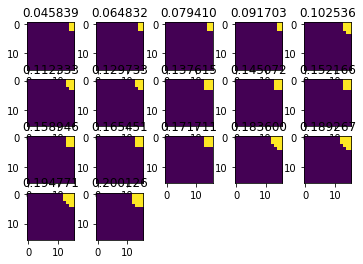

In [38]:
import os
import collections

ROOT = os.getcwd()
Problem = collections.namedtuple("Problem", ["image", "mask", "values", "complexity"])

def create_id22_17_problem():
    # Problem containing an image of 4096x4096 with 17 rings
    data = numpy.load(ROOT + "/data/id22_17.npz")
    image = data["tth"]
    mask = (data["mask"] != 0)
    values = data["angles"]
    return Problem(image, mask, values, None)

problem = create_id22_17_problem()
minmax = get_minmax_block(problem.image, 256)

from matplotlib import pyplot
pyplot.figure()
for i, v in enumerate(problem.values):
    pyplot.subplot(len(problem.values) // 5 + 1, 5, i + 1)
    result = numpy.logical_and(minmax[0] < v, v < minmax[1])
    result = numpy.array(result, dtype=numpy.int8)
    pyplot.imshow(result)
    pyplot.title("%f" % v)
pyplot.show()